In [56]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
airp_data=pd.read_csv("C:/Users/gaura/OneDrive/Desktop/Python Class/ML Case studies/AirPassengers.csv")

In [5]:
airp_data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [6]:
airp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
Month          144 non-null object
#Passengers    144 non-null int64
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [9]:
date=pd.date_range(start='1949-01-01', freq='MS', periods=len(airp_data))
date

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', length=144, freq='MS')

In [12]:
airp_data.rename(columns={'#Passengers':'Passengers'}, inplace=True)
airp_data.set_index(date, inplace=True)
airp_data.head(5)

,Month,Passengers
1949-01-01,1949-01,112
1949-02-01,1949-02,118
1949-03-01,1949-03,132
1949-04-01,1949-04,129
1949-05-01,1949-05,121


In [15]:
# extract out the time-series
airp_ts = airp_data['Passengers']
airp_ts

1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
             ... 
1960-08-01    606
1960-09-01    508
1960-10-01    461
1960-11-01    390
1960-12-01    432
Freq: MS, Name: Passengers, Length: 144, dtype: int64

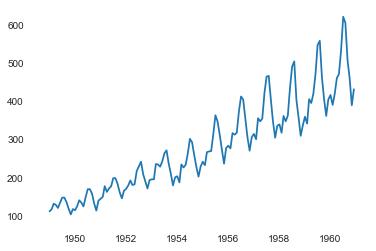

In [17]:
plt.plot(airp_ts)

According to graph, data showing Tred and seasonality

In [19]:
# Data Exploratory using Decomposition
import statsmodels.api as sm

In [20]:
decomposition = sm.tsa.seasonal_decompose(airp_ts, model='multiplicative',two_sided=False, extrapolate_trend=4)

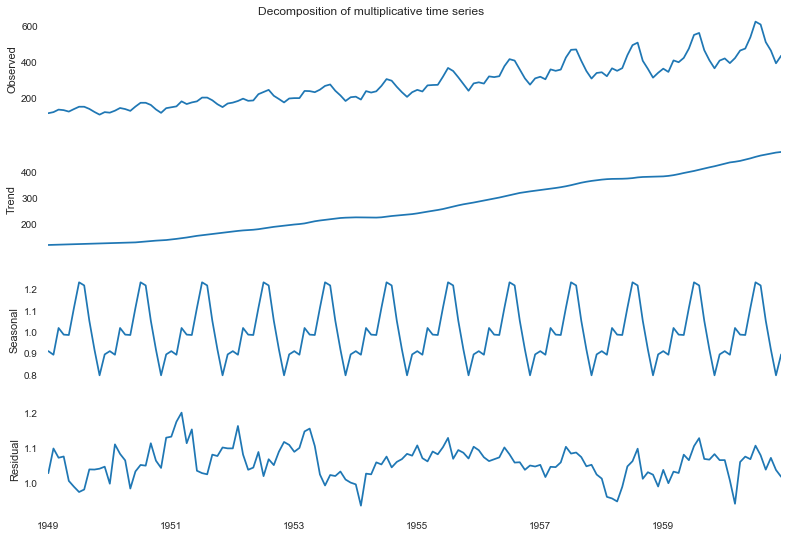

In [21]:
fig = decomposition.plot()
fig.set_figwidth(12)
fig.set_figheight(8)
fig.suptitle('Decomposition of multiplicative time series')
plt.show()

### Asumption Check..( Whether Series is Stationary or not)

In [22]:
from statsmodels.tsa.stattools import adfuller

In [23]:
# Perform Dickey-Fuller test:
from statsmodels.tsa.stattools import adfuller
print('Results of Dickey-Fuller Test:')
dftest = adfuller(airp_ts)
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#lags Used', 'Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value

Results of Dickey-Fuller Test:


In [24]:
print(dfoutput)

Test Statistic                   0.815369
p-value                          0.991880
#lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


p-value > 0.05, data is not stationary

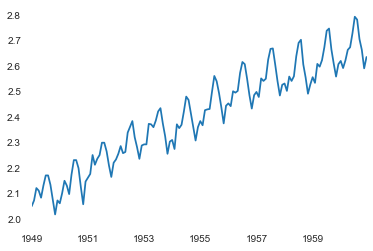

In [29]:
airp_ts_log=np.log10(airp_ts)
airp_ts_log.plot()

In [30]:
# Performing Dickey-Fuller test:
from statsmodels.tsa.stattools import adfuller
print('Results of Dickey-Fuller Test:')
dftest = adfuller(airp_ts_log)
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#lags Used', 'Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                  -1.717017
p-value                          0.422367
#lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [32]:
airp_ts.diff(1).head()

1949-01-01     NaN
1949-02-01     6.0
1949-03-01    14.0
1949-04-01    -3.0
1949-05-01    -8.0
Freq: MS, Name: Passengers, dtype: float64

In [33]:
airp_ts_diff1= airp_ts.diff(1)
airp_ts_diff1.dropna(inplace=True)

In [34]:
# Perform Dickey-Fuller test:
from statsmodels.tsa.stattools import adfuller
print('Results of Dickey-Fuller Test:')
dftest = adfuller(airp_ts_diff1)
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#lags Used', 'Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                  -2.829267
p-value                          0.054213
#lags Used                      12.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [44]:
airp_ts_log_diff1 = airp_ts_log.diff(1)
airp_ts_log_diff1.dropna(inplace=True)

In [45]:
# Perform Dickey-Fuller test:
from statsmodels.tsa.stattools import adfuller
print('Results of Dickey-Fuller Test:')
dftest = adfuller(airp_ts_log_diff1)
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#lags Used', 'Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                  -2.717131
p-value                          0.071121
#lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


In [46]:
airp_ts.diff(2).head()

1949-01-01     NaN
1949-02-01     NaN
1949-03-01    20.0
1949-04-01    11.0
1949-05-01   -11.0
Freq: MS, Name: Passengers, dtype: float64

In [49]:
airp_ts_log_diff2 =airp_ts_log.diff(2)
airp_ts_log_diff2.dropna(inplace=True)

In [50]:
# Perform Dickey-Fuller test:
from statsmodels.tsa.stattools import adfuller
print('Results of Dickey-Fuller Test:')
dftest = adfuller(airp_ts_diff2)
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#lags Used', 'Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                  -2.961695
p-value                          0.038630
#lags Used                      11.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


 Now P-Value < 0.05, so series is stationary now

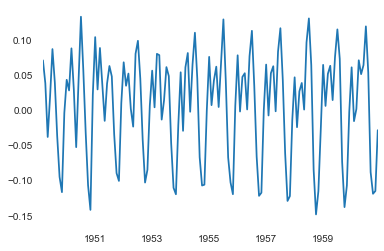

In [52]:
airp_ts_log_diff2.plot()

To calculate p & q value , we have to build ACF (Autocorrelation graph) & PACF(Partial Autocorrelation graph) sample.

value of p will find out from PACF graph and value of q will find out from ACF graph.

C:\Users\gaura\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


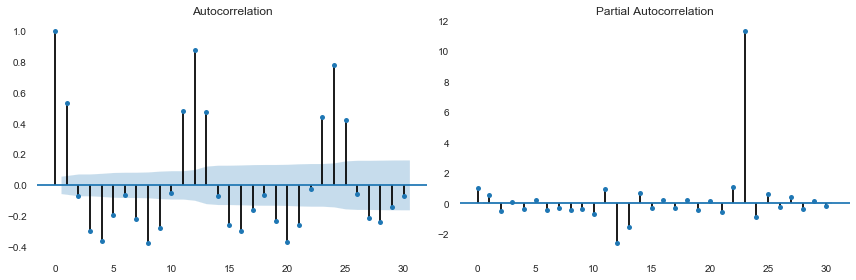

In [58]:
fig, axes = plt.subplots(1, 2, sharey=False, sharex=False)
fig.set_figwidth(12)
fig.set_figheight(4)
smt.graphics.plot_acf(airp_ts_log_diff2, lags=30, ax=axes[0], alpha=0.5)
smt.graphics.plot_pacf(airp_ts_log_diff2, lags=30, ax=axes[1], alpha=0.5)
plt.tight_layout()

Model is possible

Series showing seasonality of 12 months beacause of pettern in the ACF graph, So the best fit model will "SARIMA"(Seasonal ARIMA).

pdq values-

p=1, from PACF, after 1 lag values become 0/cross 0.

q=1, from ACF, after 1 lag values become 0/cross 0.

d=2, after 2 difference model become stationary.

In [61]:
model = sm.tsa.statespace.SARIMAX(airp_ts_log, order = (1,2,1), seasonal_order= (1,0,0,12),
                                             enforce_stationarity=False,
                                             enforce_invertibility=False)
results = model.fit()
print(results.summary())

                                 Statespace Model Results                                 
Dep. Variable:                         Passengers   No. Observations:                  144
Model:             SARIMAX(1, 2, 1)x(1, 0, 0, 12)   Log Likelihood                 328.900
Date:                            Sat, 11 Apr 2020   AIC                           -649.800
Time:                                    05:59:36   BIC                           -638.361
Sample:                                01-01-1949   HQIC                          -645.152
                                     - 12-01-1960                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3258      0.068     -4.770      0.000      -0.460      -0.192
ma.L1         -1.0001     11.726   

In this model AIC (Akaike Information Criterion)> BIC (Bayesian Information Criterion)

For best model, AIC should be less than BIC, "AIC<BIC"


In [64]:
import itertools
p = q = range(0, 3) 
d = range(2,3) 
pdq = list(itertools.product(p, d, q))


In [65]:
pdq

[(0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (2, 2, 0),
 (2, 2, 1),
 (2, 2, 2)]

In [78]:
D = range(0,2)
P = Q = range(0, 2) 
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(P, D, Q))]

In [80]:
seasonal_pdq

[(0, 0, 0, 12),
 (0, 0, 1, 12),
 (0, 1, 0, 12),
 (0, 1, 1, 12),
 (1, 0, 0, 12),
 (1, 0, 1, 12),
 (1, 1, 0, 12),
 (1, 1, 1, 12)]

In [85]:
import sys
import warnings
warnings.filterwarnings("ignore") # specify to ignore warning messages

best_aic = np.inf
best_pdq = None
best_seasonal_pdq = None
temp_model = None

for param in pdq:
    for param_seasonal in seasonal_pdq:
        
        try:
            temp_model = sm.tsa.statespace.SARIMAX(airp_ts_log,
                                             order = param,
                                             seasonal_order = param_seasonal,
                                             enforce_stationarity=False,
                                             enforce_invertibility=False)
            results = temp_model.fit()

            # print("SARIMAX{}x{}12 - AIC:{}".format(param, param_seasonal, results.aic))
            if results.aic < best_aic:
                best_aic = results.aic
                best_pdq = param
                best_seasonal_pdq = param_seasonal
        except:
            #print("Unexpected error:", sys.exc_info()[0])
            continue
print("Best SARIMAX{}x{}12 model - AIC:{}".format(best_pdq, best_seasonal_pdq, best_aic))

Best SARIMAX(1, 2, 1)x(1, 0, 1, 12)12 model - AIC:-671.9764628002795


In [87]:
best_model = sm.tsa.statespace.SARIMAX(airp_ts_log,
                                      order=(1, 2, 1),
                                      seasonal_order=(1, 0, 1, 12),
                                      enforce_stationarity=False,
                                      enforce_invertibility=False)
best_results = best_model.fit()

In [88]:
print(best_results.summary())

                                 Statespace Model Results                                 
Dep. Variable:                         Passengers   No. Observations:                  144
Model:             SARIMAX(1, 2, 1)x(1, 0, 1, 12)   Log Likelihood                 340.988
Date:                            Sat, 11 Apr 2020   AIC                           -671.976
Time:                                    06:14:13   BIC                           -657.716
Sample:                                01-01-1949   HQIC                          -666.182
                                     - 12-01-1960                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3460      0.071     -4.879      0.000      -0.485      -0.207
ma.L1         -1.0000     27.046   

### Prediction/Forecasting the result

In [91]:
pred_dynamic = best_results.get_prediction(start=pd.to_datetime('1960-01-01'), full_results=True)
pred_dynamic.predicted_mean

1960-01-01    2.623841
1960-02-01    2.600084
1960-03-01    2.662608
1960-04-01    2.623411
1960-05-01    2.663111
1960-06-01    2.739853
1960-07-01    2.787530
1960-08-01    2.796164
1960-09-01    2.709773
1960-10-01    2.648084
1960-11-01    2.602558
1960-12-01    2.643073
Freq: MS, dtype: float64

In [92]:
forecast=np.power(10, pred_dynamic.predicted_mean) # Deffecting the logarthmic value
forecast

1960-01-01    420.572473
1960-02-01    398.184452
1960-03-01    459.841040
1960-04-01    420.156659
1960-05-01    460.374225
1960-06-01    549.354747
1960-07-01    613.098239
1960-08-01    625.408599
1960-09-01    512.593623
1960-10-01    444.716823
1960-11-01    400.458829
1960-12-01    439.615328
Freq: MS, dtype: float64

In [93]:
actual=airp_ts['1960-01-01':] # Actual Data
actual

1960-01-01    417
1960-02-01    391
1960-03-01    419
1960-04-01    461
1960-05-01    472
1960-06-01    535
1960-07-01    622
1960-08-01    606
1960-09-01    508
1960-10-01    461
1960-11-01    390
1960-12-01    432
Freq: MS, Name: Passengers, dtype: int64

In [96]:
MAPE_last1year = np.mean(np.abs(actual - forecast)/actual)
print('The Mean Absolute percentage error of our forecast is {}'.format(round(MAPE_last1year, 4)))


The Mean Absolute percentage error of our forecast is 0.0333


In [97]:
# Compute the mean square error
mse = ((actual - forecast) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 4)))
print('The ROOT Mean Squared Error of our forecasts is {}'.format(np.sqrt(round(mse, 4))))

The Mean Squared Error of our forecasts is 387.6103
The ROOT Mean Squared Error of our forecasts is 19.68782110849243


In [98]:
np.power(10, best_results.forecast(steps=36))

1961-01-01    448.251135
1961-02-01    423.166776
1961-03-01    476.324489
1961-04-01    489.428160
1961-05-01    505.850792
1961-06-01    579.824964
1961-07-01    666.115313
1961-08-01    662.913016
1961-09-01    554.000758
1961-10-01    492.971353
1961-11-01    425.734723
1961-12-01    472.696965
1962-01-01    490.031759
1962-02-01    462.592938
1962-03-01    520.689265
1962-04-01    534.962075
1962-05-01    552.841801
1962-06-01    633.759305
1962-07-01    728.158049
1962-08-01    724.513737
1962-09-01    605.130189
1962-10-01    538.230098
1962-11-01    464.584671
1962-12-01    515.852774
1963-01-01    534.711390
1963-02-01    504.612381
1963-03-01    568.025201
1963-04-01    583.519993
1963-05-01    602.952224
1963-06-01    691.279618
1963-07-01    794.336578
1963-08-01    790.203552
1963-09-01    659.612808
1963-10-01    586.429261
1963-11-01    505.931317
1963-12-01    561.784361
Freq: MS, dtype: float64

In [99]:
# Get forecast 36 steps (3 years) ahead in future
n_steps = 36
pred_uc_99 = best_results.get_forecast(steps=36, alpha=0.01) # alpha=0.01 signifies 99% confidence interval
pred_uc_95 = best_results.get_forecast(steps=36, alpha=0.05) # alpha=0.05 95% CI

# Get confidence intervals 95% & 99% of the forecasts
pred_ci_99 = pred_uc_99.conf_int()
pred_ci_95 = pred_uc_95.conf_int()

In [100]:
pred_ci_99.head()

,lower Passengers,upper Passengers
1961-01-01,2.619557,2.683486
1961-02-01,2.588146,2.664877
1961-03-01,2.631975,2.723831
1961-04-01,2.637793,2.741585
1961-05-01,2.646486,2.761559


In [101]:
pred_ci_95.head()

,lower Passengers,upper Passengers
1961-01-01,2.619557,2.683486
1961-02-01,2.588146,2.664877
1961-03-01,2.631975,2.723831
1961-04-01,2.637793,2.741585
1961-05-01,2.646486,2.761559


In [107]:
n_steps = 36
idx = pd.date_range(airp_ts.index[-1], periods=n_steps, freq='MS')
fc_95 = pd.DataFrame(np.column_stack([np.power(10, pred_uc_95.predicted_mean), np.power(10, pred_ci_95)]), 
                     index=idx, columns=['forecast', 'lower_ci_95', 'upper_ci_95'])
fc_99 = pd.DataFrame(np.column_stack([np.power(10, pred_ci_99)]), 
                     index=idx, columns=['lower_ci_99', 'upper_ci_99'])

In [108]:
fc_95.head()

,forecast,lower_ci_95,upper_ci_95
1960-12-01,448.251135,416.444436,482.487128
1961-01-01,423.166776,387.387918,462.250142
1961-02-01,476.324489,428.523450,529.457650
1961-03-01,489.428160,434.302819,551.550470
1961-04-01,505.850792,443.083763,577.509369


In [109]:
fc_99.head()

,lower_ci_99,upper_ci_99
1960-12-01,416.444436,482.487128
1961-01-01,387.387918,462.250142
1961-02-01,428.523450,529.457650
1961-03-01,434.302819,551.550470
1961-04-01,443.083763,577.509369


In [110]:
fc_all = fc_95.combine_first(fc_99)
fc_all = fc_all[['forecast', 'lower_ci_95', 'upper_ci_95', 'lower_ci_99', 'upper_ci_99']] # just reordering columns
fc_all.head()

,forecast,lower_ci_95,upper_ci_95,lower_ci_99,upper_ci_99
1960-12-01,448.251135,416.444436,482.487128,416.444436,482.487128
1961-01-01,423.166776,387.387918,462.250142,387.387918,462.250142
1961-02-01,476.324489,428.523450,529.457650,428.523450,529.457650
1961-03-01,489.428160,434.302819,551.550470,434.302819,551.550470
1961-04-01,505.850792,443.083763,577.509369,443.083763,577.509369


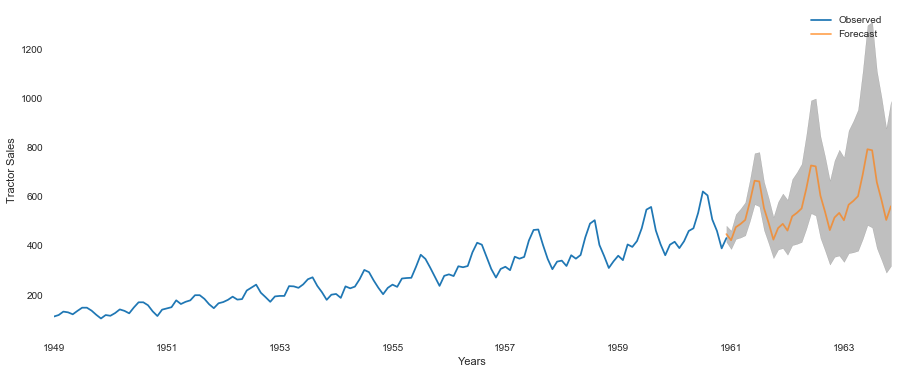

In [112]:
# plot the forecast along with the confidence band
axis = airp_ts.plot(label='Observed', figsize=(15, 6))
fc_all['forecast'].plot(ax=axis, label='Forecast', alpha=0.7)
#axis.fill_between(fc_all.index, fc_all['lower_ci_95'], fc_all['upper_ci_95'], color='k', alpha=.25)
axis.fill_between(fc_all.index, fc_all['lower_ci_99'], fc_all['upper_ci_99'], color='k', alpha=.25)
axis.set_xlabel('Years')
axis.set_ylabel('Tractor Sales')
plt.legend(loc='best')
plt.show()

### Residual Diagnostics

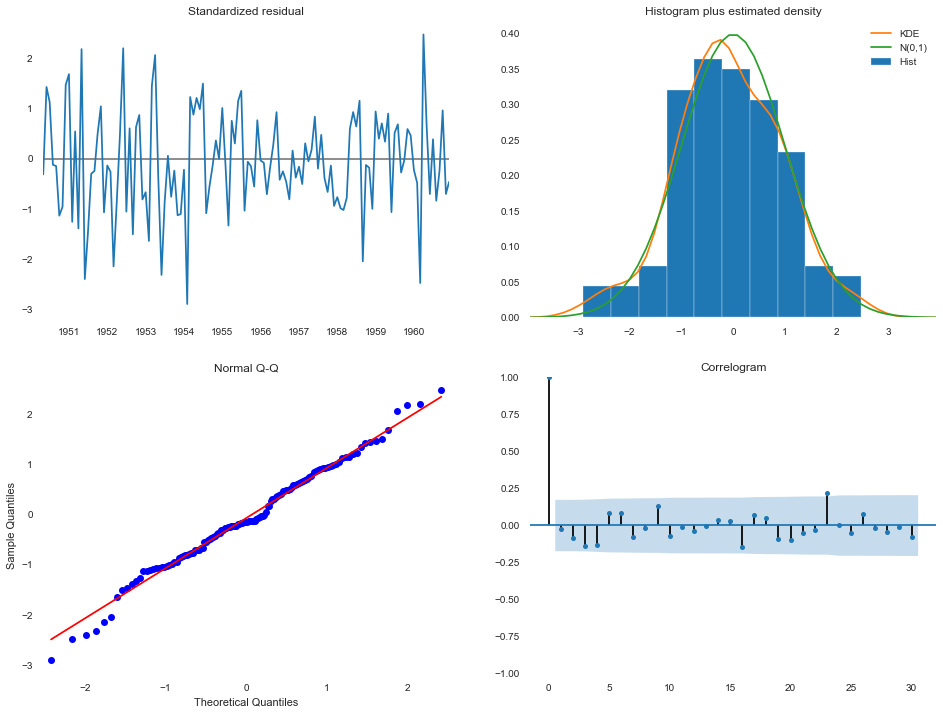

In [113]:
best_results.plot_diagnostics(lags=30, figsize=(16,12))
plt.show()